In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
train = pd.read_csv(r'F:\Sync\Work\Kaggle Competitions\Ventilator Pressure Prediction\Data\train.csv')
test = pd.read_csv(r'F:\Sync\Work\Kaggle Competitions\Ventilator Pressure Prediction\Data\test.csv')

In [13]:
np.iinfo(np.int32)

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [14]:
print(f'Train R values: {train.R.unique()}')
print(f'Test R values: {test.R.unique()}')

print(f'Train C values: {train.C.unique()}')
print(f'Test C values: {test.C.unique()}')

Train R values: [20 50  5]
Test R values: [ 5 50 20]
Train C values: [50 20 10]
Test C values: [20 50 10]


<AxesSubplot:xlabel='R', ylabel='Count'>

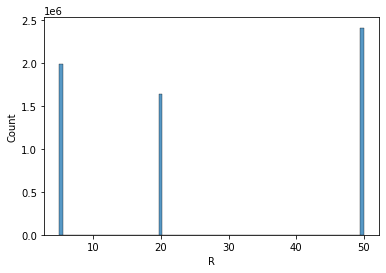

In [15]:
# what is the distribution of R?
sns.histplot(data=train.R)

<AxesSubplot:xlabel='C', ylabel='Count'>

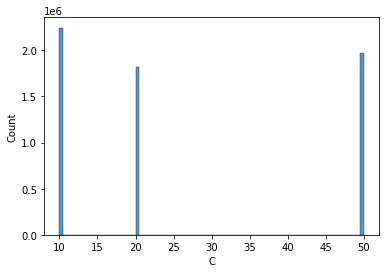

In [16]:
# What is the distributionof C?
sns.histplot(data=train.C)

In [23]:
train_r5 = train[train.R == 5]
train_r5.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
320,321,5,5,50,0.000000,21.424375,0,6.329607
321,322,5,5,50,0.033967,28.504653,0,7.384139
322,323,5,5,50,0.068797,29.353025,0,8.368369
323,324,5,5,50,0.102813,30.502095,0,9.001088
324,325,5,5,50,0.136925,31.024647,0,9.774412


In [24]:
train_r5c10 = train_r5[train.C == 10]
train_r5c10.head()

C:\Users\Jon\AppData\Local\Temp/ipykernel_5372/4165499333.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_r5c10 = train_r5[train.C == 10]


,id,breath_id,R,C,time_step,u_in,u_out,pressure
2560,2561,39,5,10,0.000000,33.092845,0,6.189002
2561,2562,39,5,10,0.033633,100.000000,0,7.665347
2562,2563,39,5,10,0.067378,82.875875,0,14.554958
2563,2564,39,5,10,0.101031,63.513762,0,19.476108
2564,2565,39,5,10,0.134777,55.044110,0,21.655474


In [28]:
len(train_r5c10)

664960

In [32]:
len(train_r5c10.breath_id.unique())
# 8312 breath samples of 80 counts for r=5, c = 10

8312

In [33]:
664960/8312

80.0

In [35]:
breath_r5c10_idx = train_r5c10.breath_id.unique()

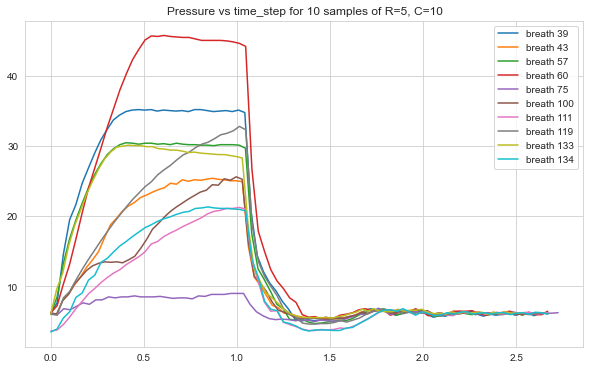

In [53]:
plt.figure(figsize=(10,6))
for i in breath_r5c10_idx[0:10]:
    temp_data = train_r5c10[train_r5c10.breath_id == i]
    plt.plot(temp_data['time_step'],temp_data['pressure'],label=f'breath {i}')
    #plt.plot(temp_data['time_step'],temp_data['u_in'])
    plt.legend()
    plt.title('Pressure vs time_step for 10 samples of R=5, C=10')

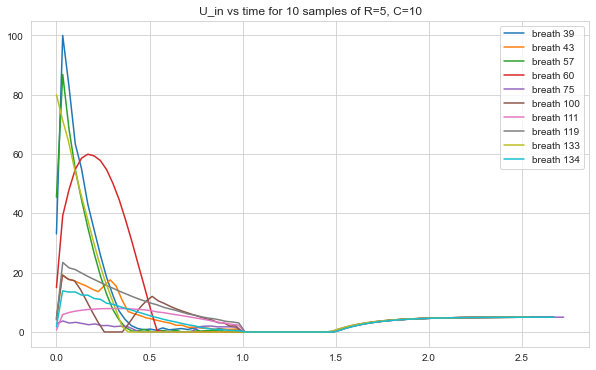

In [54]:
plt.figure(figsize=(10,6))
for i in breath_r5c10_idx[0:10]:
    temp_data = train_r5c10[train_r5c10.breath_id == i]
    #plt.plot(temp_data['time_step'],temp_data['pressure'])
    plt.plot(temp_data['time_step'],temp_data['u_in'],label=f'breath {i}')
    plt.legend()
    plt.title('U_in vs time for 10 samples of R=5, C=10')

In [ ]:
# does u_in start at 0 always?